In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Artistic live art app
Here you have some functions that modify images and video using OpenCV.

The first function, adds an edge detection filter to an image and saves the new image to disk, something like this:

![potter.png](output/modified.jpg)


Let's load an image to test the function.

In [108]:
test_img = cv2.imread("../img/janpotter.png")


In [109]:
def image_modifier(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_img, 30, 127)
    ret, thresh_binary_inverted = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY_INV)

    cv2.imwrite("../output/modified.jpg", thresh_binary_inverted)
    plt.figure(figsize = (20,15));
    plt.title("Your image")
    plt.imshow(thresh_binary_inverted, cmap='gray')


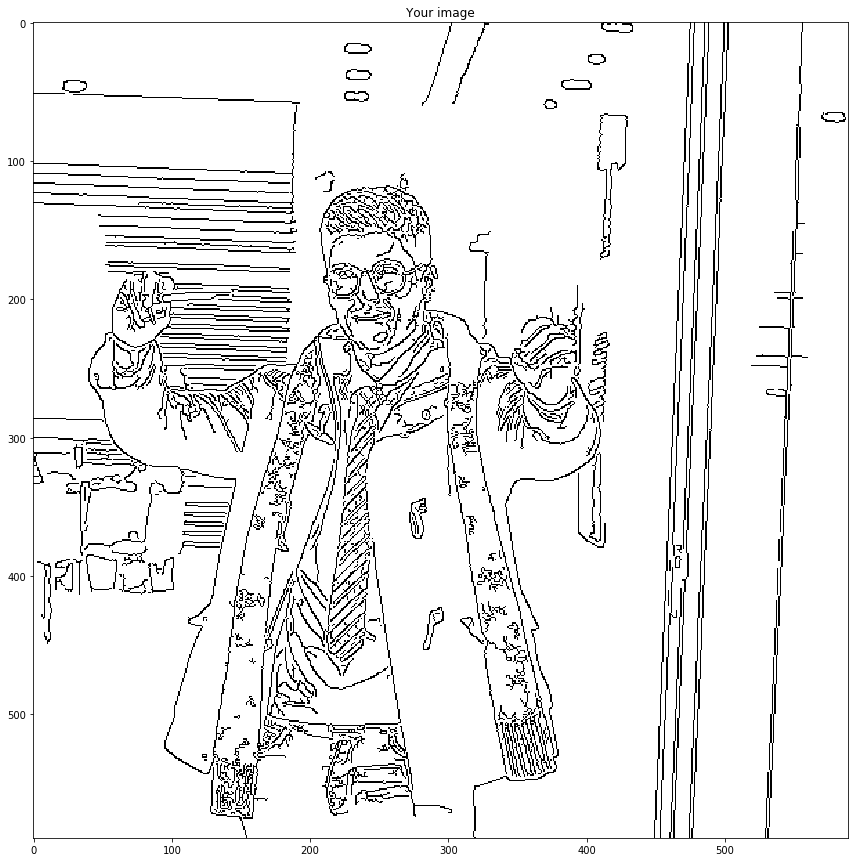

In [110]:
image_modifier(test_img)

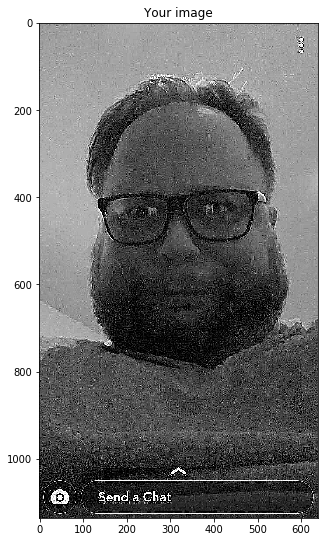

In [111]:
image_sharpener(jan)

Here is another function that applies the same image transformation but this time it does it in real time using your webcam.

In [112]:
def video_modifier_edges():
    cap = cv2.VideoCapture(0)

    while(True):
        #capture frame-by-frame
        ret, frame = cap.read()

        #our operations  on the frame come here
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        img = img.astype('uint8')
        edges = cv2.Canny(img, 90, 127)
        ret, thresh_binary_inverted = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY_INV)

        #Display the resulting frame
        cv2.imshow('Video, press \'q\' to close', thresh_binary_inverted)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [113]:
video_modifier_edges()

In [40]:
def video_modifier_sharpen():
    cap = cv2.VideoCapture(0)

    while(True):
        #capture frame-by-frame
        ret, frame = cap.read()

        #our operations  on the frame come here
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        img = img.astype('uint8')
        sharpening_kernel = np.ones((3,3), np.float32) * -1
        sharpening_kernel[1,1] = 8
        sharp_img = cv2.filter2D(img, -1, sharpening_kernel)

        #Display the resulting frame
        cv2.imshow('Video, press \'q\' to close', sharp_img)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [ ]:
video_modifier_sharpen()

In [104]:
def noise_reducer(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_upscaled =  cv2.resize(img_rgb, None, fx=8, fy=8, interpolation=cv2.INTER_LANCZOS4)
    img_blurred = cv2.medianBlur(img_upscaled, 19)

    #img_denoised = cv2.fastNlMeansDenoisingColored(img_blurred, None, 13, 13, 7, 15) 
    
    return img_blurred


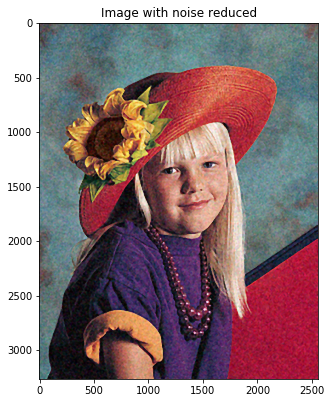

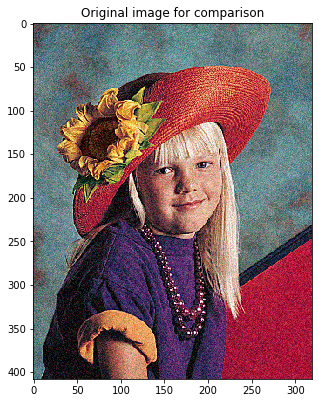

In [105]:
# loading the noisy picture
noisy = cv2.imread("../img/noisy.png")
img_fixed = noise_reducer(noisy)

img_rgb = cv2.cvtColor(noisy, cv2.COLOR_BGR2RGB)

titles = ["Image with noise reduced", "Original image for comparison"]
images = [img_fixed, img_rgb]

for i in range(2):
    plt.figure(figsize = (5,15));
    plt.title(titles[i])
    plt.imshow(images[i])